In [1]:
import sys

from qetu_sim import *

import numpy as np
import scipy.linalg
import itertools
import matplotlib.pyplot as plt

from qiskit import *
from qiskit.transpiler import Layout
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import Permutation
from qiskit.visualization import *
from qiskit_aer import AerSimulator

In [2]:
u = 1
t = 1
delta_t = 1
n = 1
num_sites = 4

In [3]:
H_ref = ref_fh_hamiltonian(u=u, t=t, WMI_qubit_layout=True, include_aux=True)
λ, v = np.linalg.eigh(H_ref)
ground_state_energy = λ[0]
ground_state_vector = v[:,0]

In [4]:
u = 1
t = 1
delta_t = 1
degree_list = range(1,51,1)
trotter_steps_list = range(1,2)
overlap_list = []
overlap_noise_list = []

for degree in degree_list:
    E_min, E_mu_m, E_mu_p, E_max = calculate_qsp_params(u, t)
    qsp = QSPPhase()
    phi_seq_su2 = qsp.cvx_qsp_heaviside(
        degree, 
        E_min,
        E_mu_m, 
        E_mu_p, 
        E_max
    )
    for trotter_steps in trotter_steps_list:
        print("Degree: " + str(degree) + "\t Trotter steps: " + str(trotter_steps))
        print("-------------------------")
        #phi_vec = convert_Zrot_to_Xrot(phi_seq_su2)
        phi_vec = phi_seq_su2
        QETU_circ = construct_QETU_circ(u, t, trotter_steps, phi_vec)
        QETU_circ_WMI = transpile_QETU_to_WMI(QETU_circ)
        final_state = qetu_sim(QETU_circ_WMI)
        success_probability = scipy.linalg.norm(final_state)**2
        overlap = abs(np.vdot(final_state, ground_state_vector))**2
        print("success probability: " + str(success_probability))
        print("overlap: " + str(overlap))
        noise_model = wmi_grid_noise_model()
        final_state_noise = qetu_sim(QETU_circ_WMI, noise_model)
        overlap_noise = abs(np.vdot(final_state_noise, ground_state_vector))**2
        print("overlap noise: " + str(overlap_noise))
        overlap_list.append(overlap)
        overlap_noise_list.append(overlap_noise)


starting matlab engine..
Degree: 1	 Trotter steps: 1
-------------------------
success probability: 0.9999999999999996
overlap: 0.12773000689607872
overlap noise: 6.804204713100052e-05

starting matlab engine..

stopping matlab engine..
Degree: 2	 Trotter steps: 1
-------------------------
success probability: 0.9999999999999998
overlap: 0.2297064592835481
overlap noise: 0.003101902331448579

starting matlab engine..

stopping matlab engine..
Degree: 3	 Trotter steps: 1
-------------------------
success probability: 1.0
overlap: 0.20518397390686438
overlap noise: 5.273158639299881e-35

starting matlab engine..

stopping matlab engine..
Degree: 4	 Trotter steps: 1
-------------------------
success probability: 0.9999999999999998
overlap: 0.18726518827520652
overlap noise: 3.216376554987253e-34

starting matlab engine..

stopping matlab engine..
Degree: 5	 Trotter steps: 1
-------------------------
success probability: 0.9999999999999998
overlap: 0.2858555304393979
overlap noise: 0.0012

Text(0, 0.5, 'overlap')

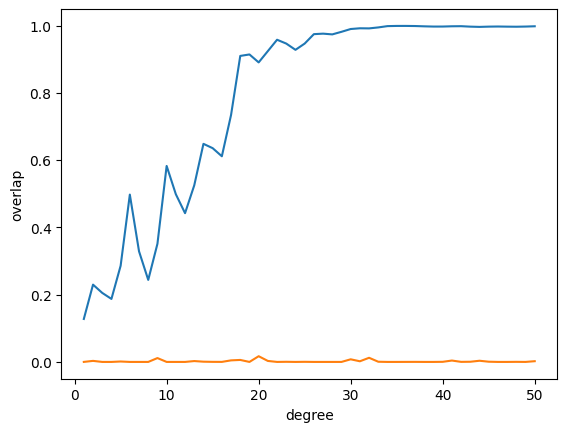

In [5]:
plt.plot(degree_list, overlap_list)
plt.plot(degree_list, overlap_noise_list)
plt.xlabel("degree")
plt.ylabel("overlap")

In [6]:
for i in range(len(overlap_list)):
    print("(" + str(i+1) + ", " + str(overlap_list[i]) + ")")

(1, 0.12773000689607872)
(2, 0.2297064592835481)
(3, 0.20518397390686438)
(4, 0.18726518827520652)
(5, 0.2858555304393979)
(6, 0.49736169283525233)
(7, 0.32863584568447995)
(8, 0.2438233474460288)
(9, 0.3511845209114348)
(10, 0.5825616492738687)
(11, 0.49843191423139394)
(12, 0.4421643144052422)
(13, 0.524918793011593)
(14, 0.648227818817075)
(15, 0.6354081350304984)
(16, 0.6112927236669288)
(17, 0.7341704459880044)
(18, 0.909592134940673)
(19, 0.9139625169440085)
(20, 0.89032696787065)
(21, 0.9240052621411905)
(22, 0.9576749698871913)
(23, 0.9462595462861119)
(24, 0.9276838177249873)
(25, 0.9462717742243079)
(26, 0.9742926429337533)
(27, 0.9757758653344956)
(28, 0.9735779601990678)
(29, 0.9812431746812187)
(30, 0.9895601768781419)
(31, 0.991738710849513)
(32, 0.9914261134528054)
(33, 0.9942993341291367)
(34, 0.9981737823635449)
(35, 0.9987198248845948)
(36, 0.9987553897408731)
(37, 0.9984227593379945)
(38, 0.9975362498309202)
(39, 0.9968454401523372)
(40, 0.9969019384949921)
(41, 0.99